# COS3a Übung 4
---
Abgabe bis 08.11.2022 12:00 Uhr

# Lösung

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Übung
### Aufgabe 6 - Entropie

#### 6.a)
Die Entropie $S$ eines Makrozustands ist definiert durch:

\begin{equation}
S = k_\mathrm{B} \cdot \ln(\Omega), 
\end{equation}

wobei $\Omega$ die Anzahl der Mikrozustände des Makrozustands angibt und $k_\mathrm{B}$ die Boltzmannkonstante ist. 

Stellen Sie sich ein Würfelexperiment mit zwei sechsseitigen Würfeln vor. Die Makrozustände sollen definiert sein als die Augensumme beider Würfel und die Mikrozustände als mögliche Würfelkombinationen, die die jeweiligen Makrozustände realisieren.
Berechnen Sie die Entropie für den wahrscheinlichsten und unwahrscheinlichsten Makrozustand in Einheiten von $k_\mathrm{B}$.

Entropie für unwahrscheinlichsten Zustand in $k_\mathrm{B}$:

In [4]:
# entweder 2 oder 12
entropy = np.log(1)
print(f"Die Entropie der Augensumme 2 beträgt {entropy:.1f} kB")

Die Entropie der Augensumme 2 beträgt 0.0 kB


Entropie für wahrscheinlichsten Zustand in $k_\mathrm{B}$:

In [5]:
# für 7: 6+1, 5+2, 3+4, 4+3, 2+5, 1+6
entropy = np.log(6)
print(f"Die Entropie der Augensumme 7 beträgt {entropy:.1f} kB")

Die Entropie der Augensumme 7 beträgt 1.8 kB


#### 6.b)

Stellen Sie sich einen Raum mit 1000 Helium-Atomen vor (ideales Gas). Die zwei Zustände, die jedes Atom haben kann, ist links oder rechts im Raum zu sein. Diesen Zustand können sie spontan und unabhängig voneinander wechseln. Zu Beginn des Experiments sind alle Helium-Atome im **linken** Teil des Raums. Danach soll in jedem Zeitschritt ein zufälliges Helium-Atom seine Position wechseln dürfen, wobei es auch in dem Abschnitt bleiben kann, in dem es sich befindet.

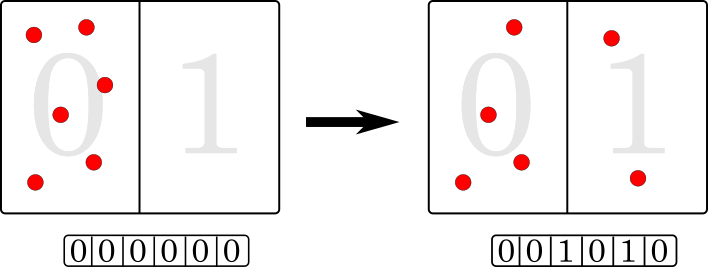

Die Anzahl an möglichen Kombinationen für einen Makrozustand des Systems lässt sich über die Binomialkoeffizienten ausdrücken:

\begin{equation}
\Omega = {n \choose k}
\begin{array}{l,l}
\leftarrow \textrm{Anzahl der Atome insgesammt} \\
\leftarrow \textrm{Anzahl der Atome im rechten Teil des Raums}
\end{array}
\end{equation}

Beispiel: Wenn sich zwei Atome im rechten Teil des Raums aufhalten, dann entspricht die Anzahl der möglichen Kombinationen:

\begin{equation}
{n \choose k} = {1000 \choose 2} = 499500
\end{equation}


**Aufgabe:** Simulieren Sie dieses Gedankenexperiment über 5000 Zeitschritte und stellen Sie die Veränderung der Entropie grafisch dar.

Programmiertipps:
- Um die Binomialkoeffizienten zu berechnen, können Sie die unten definierte Funktion `calc_binomial` verwenden. Die Anwendung ist analog zu anderen bisher verwendeten Funktionen.
- Verwenden Sie eine Liste in der jeder Eintrag einem Helium-Atom entspricht. Ob sich das Helium-Atom links oder rechts befindet, kann durch 0 bzw. 1 ausgedrückt werden.
- Die Anzahl der Atome im rechten Teil des Raums lässt sich dann einfach über die Summe der Liste berechnen.
- Den Listenindex und den neuen Zustand des Atoms können Sie über `random.randint` würfeln (Achtung: Obere Zufallsgrenze ist inklusive!).
- Speichern Sie die Entropie nach jedem Zeitschritt in einer separaten Liste.
- Plotten Sie anschließend den Verlauf der Entropie gegen die vergangenen Zeitschritte.

In [6]:
# Funktion zur Berechnung der Binomalkoeffizienten
def calc_binomial(n, k):
    if 2*k > n:
        k = n-k
    result = 1
    for i in range(1, k+1):
        result *= (n - k + i) / i
    return result

In [7]:
# Beispiel zur Verwendung der calc_binomal Funktion
calc_binomial(1000, 2)

499500.0

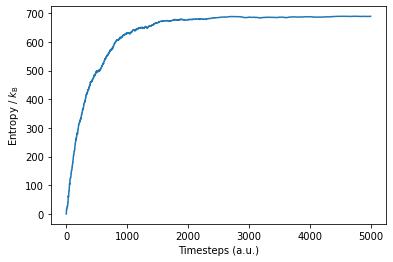

Entropie am Ende: S = 688.9556860713469 kB


In [8]:
# Definiere den Raum als Liste und fülle ihn mit Atomen auf der Linken (0) Seite
room = []
for _ in range(1000):
    room.append(0)

# Berechne Anfangsentropie und erzeuge Liste mit dieser
omega = calc_binomial(len(room), sum(room))
entropies = [np.log(omega)]

# Simulation
for _ in range(5000):
    atom_id = random.randint(0, len(room)-1)
    room[atom_id] = random.choice([0, 1])
    
    omega = calc_binomial(len(room), sum(room))
    entropies.append(np.log(omega))
    
# Plot
plt.plot(entropies)
plt.xlabel("Timesteps (a.u.)")
plt.ylabel("Entropy / $k_\mathrm{B}$")
plt.show()

print(f"Entropie am Ende: S = {entropies[-1]} kB")

#### 6.c)

Warum ändert sich die Entropie während der Simulation und welchem physikalischen Prozess entspricht die Simulation?

Antwort: Weil der wahrscheinlichste Zustand mit den meisten Mikrozuständen erreicht wird. Isotherme Expansion.

#### Vergleich mit klassischer Thermodynamik
Entropieänderung für die isotherme Expansion:

\begin{equation}
\Delta S_\mathrm{thermo} = k_\mathrm{B} n \ln\left(\frac{V_2}{V_1}\right) = k_\mathrm{B} n \ln\left(\frac{2}{1}\right)
\end{equation}

In [9]:
print(f"ΔS = {1000*np.log(2)} kB")

ΔS = 693.1471805599452 kB


#### Gesamtentropie aus stat. Thermodynamik

\begin{equation}
\Delta S_\mathrm{tot} = k_\mathrm{B} \ln\left( \sum_k^n \Omega_k \right) = k_\mathrm{B} \ln\left( \Omega_\mathrm{tot} \right) = k_\mathrm{B} \ln\left(2^n\right) = k_\mathrm{B} n \ln\left(2\right)
\end{equation}

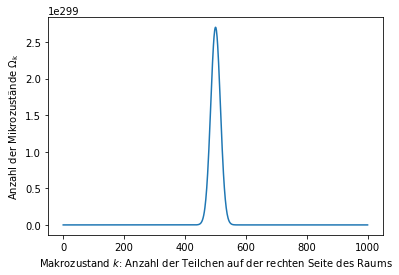

In [10]:
anzahl = 1000
x = list(range(anzahl))
y = [calc_binomial(anzahl, i) for i in x]
plt.plot(x, y)
plt.ylabel(r"Anzahl der Mikrozustände $\Omega_\mathrm{k}$")
plt.xlabel(r"Makrozustand $k$: Anzahl der Teilchen auf der rechten Seite des Raums")
plt.show()

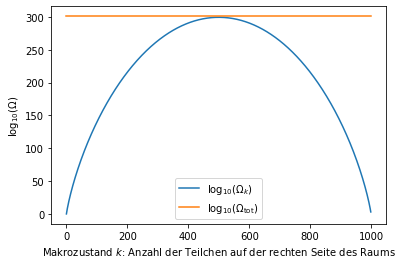

In [15]:
anzahl = 1000
x = list(range(anzahl))
plt.plot(x, [np.log10(calc_binomial(anzahl, i)) for i in x], label=r"$\log_{10}(\Omega_k)$")
plt.plot(x, [1000*np.log10(2)]*len(x), label=r"$\log_{10}(\Omega_\mathrm{tot})$")
plt.ylabel(r"$\log_{10}(\Omega)$")
plt.xlabel(r"Makrozustand $k$: Anzahl der Teilchen auf der rechten Seite des Raums")
plt.legend()
plt.show()

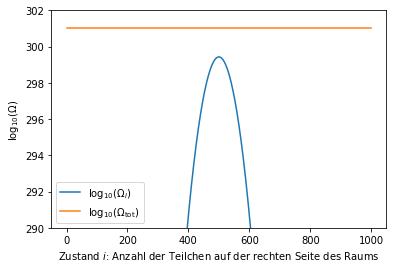

In [17]:
anzahl = 1000
x = list(range(anzahl))
plt.plot(x, [np.log10(calc_binomial(anzahl, i)) for i in x], label=r"$\log_{10}(\Omega_i)$")
plt.plot(x, [1000*np.log10(2)]*len(x), label=r"$\log_{10}(\Omega_\mathrm{tot})$")
plt.ylabel(r"$\log_{10}(\Omega)$")
plt.xlabel(r"Zustand $i$: Anzahl der Teilchen auf der rechten Seite des Raums")
plt.ylim(290, 302)
plt.legend()
plt.show()

Der Logarithmus zeigt die Größenordnung eines Zahlenwertes. Bei einer genügend großen Zahl an Teilchen, ist die die Zahl der Mikrozustände zum wahrscheinlichsten Makrozustand $\Omega_\mathrm{max}$ in der gleichen Größenordnung wie die Summe aller möglichen Mikrozustände $\Omega_\mathrm{tot}$:

\begin{equation}
\ln(\Omega_\mathrm{tot}) \approx \ln(\Omega_\mathrm{max})
\end{equation}

Dies ermöglicht eine einfache Berechnung der Entropie, weil $\Omega_\mathrm{tot}$ zugänglicher ist als $\Omega_\mathrm{max}$.

### Aufgabe 7 - Reguläre Lösungen

Sie haben in der Vorlesung die reguläre Lösung kennengelernt. Hierbei wird eine Mischung bestehend aus zwei Kooponenten (A und B) durch die Paarwechselwirkungen $\varepsilon_\mathrm{AA}$, $\varepsilon_\mathrm{BB}$ und $\varepsilon_\mathrm{AB}$ beschrieben. Visualisieren Sie $\Delta_\mathrm{mix} G_\mathrm{m}$ für den Stoffmengenanteil von B $x_\mathrm{B}$ von 0 bis 1. 

\begin{equation}
\Delta_\mathrm{mix} G_\mathrm{m} = r \varepsilon x_\mathrm{B} (1-x_\mathrm{B}) + T R (x_\mathrm{B} \ln(x_\mathrm{B}) + (1 - x_\mathrm{B}) \ln(1-x_\mathrm{B})) 
\end{equation}

Verwenden Sie folgende Parameter:

$\varepsilon_\mathrm{AA} = 5000\ \text{J/mol}$, $\varepsilon_\mathrm{AA} = 3000\ \text{J/mol}$, $\varepsilon_\mathrm{AA} = 2000 \ \text{J/mol}$, $T=500\ \text{K}$, $r = 4$



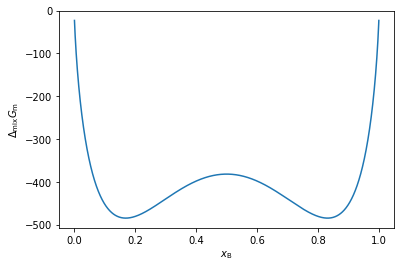

In [21]:
# Zur erzeugung der xB-Werte lässt sich np.linspace verwenden:
x_B = np.linspace(0.001, 0.999, 10000)

epsilon = 5000 - (3000 + 2000)/2
T = 500
a = 4*epsilon
b = 8.314*T

dmixGm = []
for x_B_i in x_B:
    dmixGm.append(a*x_B_i*(1-x_B_i) + 
                  b*(x_B_i*np.log(x_B_i)+(1-x_B_i)*np.log(1-x_B_i)))
    
plt.plot(x_B, dmixGm)
plt.ylabel(r"$\Delta_\mathrm{mix}G_\mathrm{m}$")
plt.xlabel(r"$x_\mathrm{B}$")
plt.show()

_Optional:_ Bei welchen $x_\mathrm{B}$ befinden sich _in etwa_ die beiden stabilen Phasen nach einer Phasentrennung?

In [23]:
# 1. Lösung
min_index = np.argmin(dmixGm)
print(x_B[min_index])

# 2. Lösung
min_value = 0
min_index = 0
for i, dmixGm_i in enumerate(dmixGm):
    if dmixGm_i < min_value:
        min_index = i
        min_value = dmixGm_i
print(x_B[min_index])

# 3. Lösung
sorted_x_B = x_B[np.argsort(dmixGm)]
print(sorted_x_B[0])

0.16908000800080006
0.16908000800080006
0.16908000800080006


Antwort: Die beiden Phasen befinden sich bei $x_\mathrm{B} = 0.169$ und $x_\mathrm{B} = 0.831$